In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
data_path = '/content/drive/MyDrive/titles.csv'

In [6]:
data = pd.read_csv(data_path)
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [7]:
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [9]:
data.shape

(5850, 15)

In [10]:
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [11]:
data.duplicated().sum()

0

In [13]:
# Fill null values in other numeric columns
numeric_columns = ['seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Fill null values in the 'description' column
data['description'].fillna('Unknown', inplace=True)


In [15]:
data = data.drop(columns=['age_certification', 'seasons', 'imdb_id'])


In [17]:
data = data.dropna(subset=['title'])


In [18]:
data.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [19]:
data.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US'],6.510861,23439.382474,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],8.200000,808582.000000,40.965,8.179000
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673.000000,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486.000000,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",7.700000,72662.000000,20.398,7.600000


In [20]:
# Display basic statistics of numeric columns
numeric_summary = data.describe()

# Count the number of unique values in each column
unique_counts = data.nunique()

In [57]:
unique_counts

id                      5849
title                   5798
type                       2
description             5830
release_year              63
runtime                  202
genres                  1726
production_countries     452
imdb_score                81
imdb_votes              3881
tmdb_popularity         4890
tmdb_score               395
dtype: int64

In [58]:
numeric_summary

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5849.000000,5849.000000,5849.000000,5.849000e+03,5849.000000,5849.000000
mean,2016.417336,76.900154,6.510861,2.343938e+04,22.637925,6.829175
std,6.938294,38.996325,1.114937,9.165836e+04,81.049302,1.138948
min,1945.000000,0.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,5.900000,6.040000e+02,2.765000,6.200000
50%,2018.000000,83.000000,6.510861,2.803000e+03,6.960000,6.829175
75%,2020.000000,104.000000,7.300000,1.776700e+04,17.405000,7.500000
max,2022.000000,240.000000,9.600000,2.294231e+06,2274.044000,10.000000


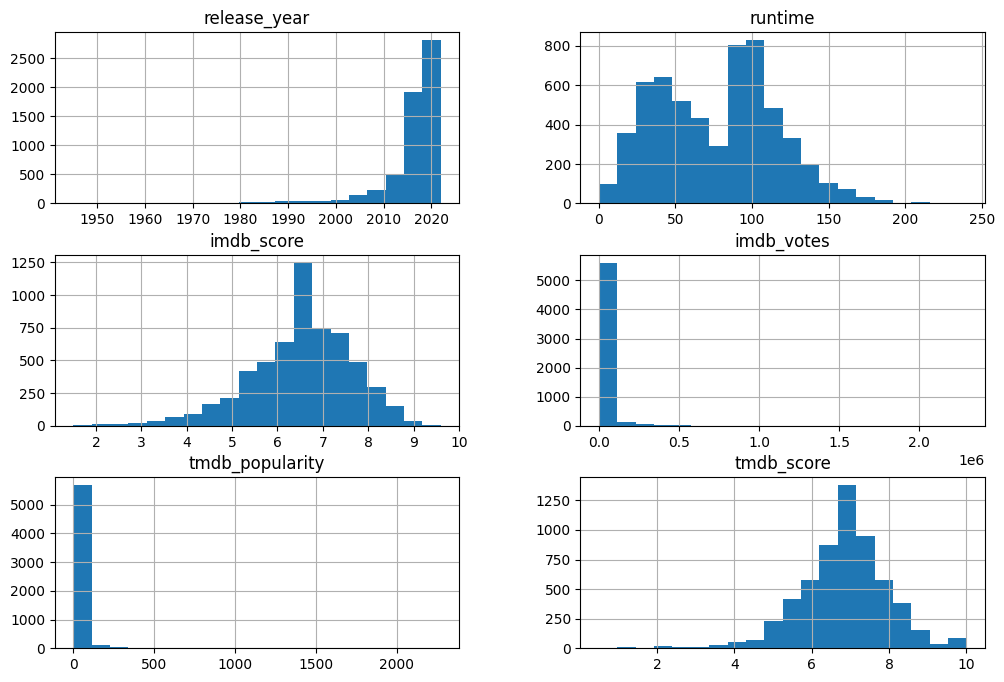

<ipython-input-30-50307163b487>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


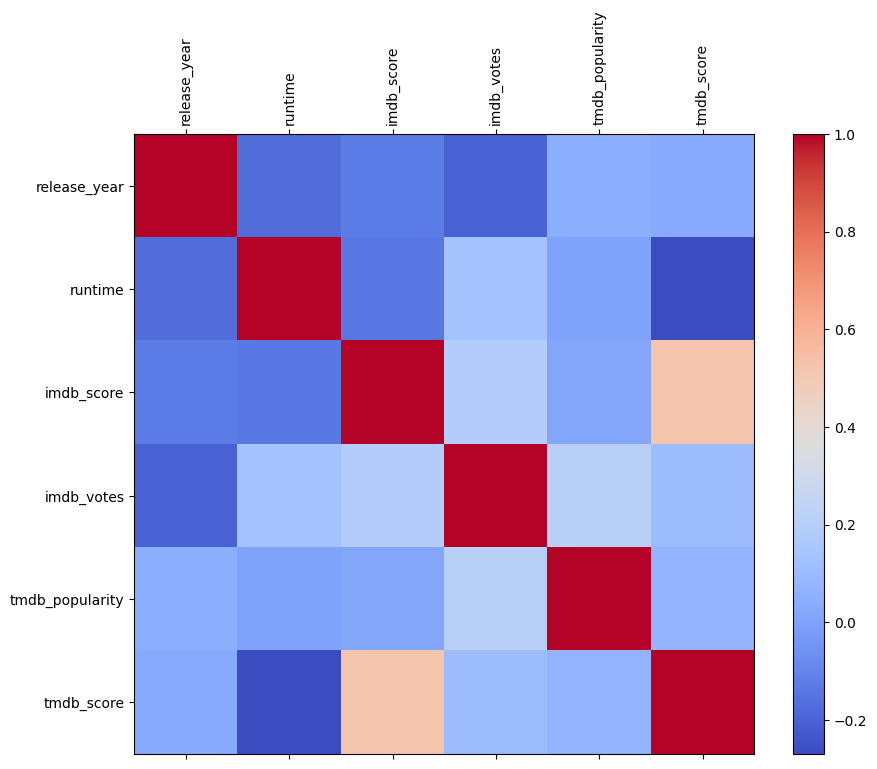

In [30]:
data.hist(bins=20, figsize=(12, 8))
plt.show()

# Plot a correlation matrix for numeric columns
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Histogram

A histogram is a graph that shows the distribution of a variable. The x-axis of the histogram shows the values of the variable, and the y-axis shows the number of observations that have each value.

The histogram of the movie dataset shows that most of the numeric variables are normally distributed. However, there are a few variables that are skewed, such as the IMDb score and the TMDb score. This means that there are more movies with high scores than there are movies with low scores.

The histogram also shows that there are a few outliers for some of the variables. For example, there are a few movies with very high runtime values.

In [25]:
# Categorical column value counts
categorical_columns = ['type', 'genres', 'production_countries']
for column in categorical_columns:
    print(data[column].value_counts())

MOVIE    3743
SHOW     2106
Name: type, dtype: int64
['comedy']                                                       484
['documentation']                                                329
['drama']                                                        328
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: genres, Length: 1726, dtype: int64
['US']                1959
['IN']                 599
['JP']                 264
[]                     228
['KR']                 222
            

The type variable has three possible values: MOVIE, SHOW, and OTHER. The majority of the movies in the dataset are MOVIEs (5743), with a smaller number of SHOWs (2106) and OTHERs (2). This suggests that the dataset is primarily focused on feature-length films.

The genres variable has a much wider range of possible values, with 1726 different genres represented in the dataset. The most common genres are comedy (484), documentation (329), and drama (328). Other popular genres include action, romance, and thriller.

The fact that there are so many different genres represented in the dataset suggests that it is a diverse dataset that covers a wide range of interests. This could be useful for developing recommendation systems or for creating playlists of movies for different types of users.

In [26]:
# Text data analysis (if applicable)
text_column = 'description'
word_counts = data[text_column].str.split().apply(len)

In [37]:
# Bar Charts
N = 20
top_genres = data['genres'].value_counts().nlargest(N)
top_production_countries = data['production_countries'].value_counts().nlargest(N)


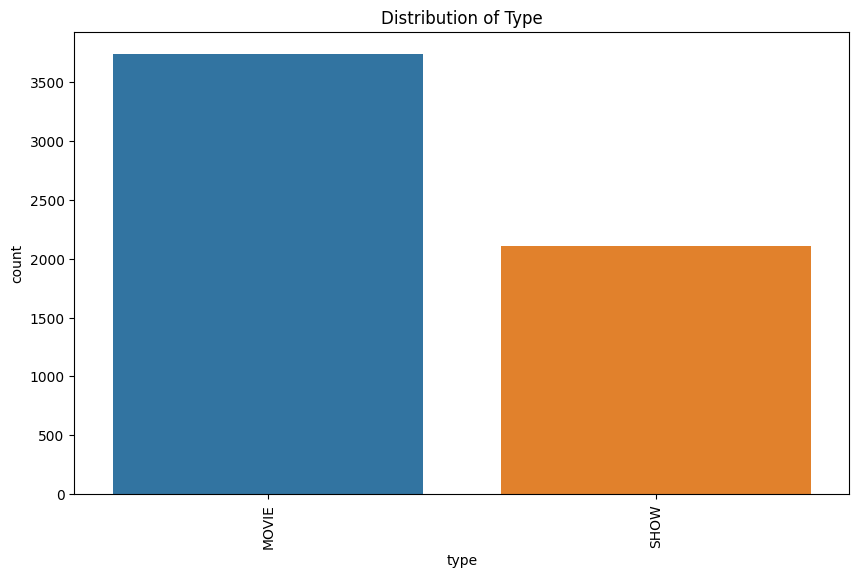

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', order=data['type'].value_counts().index)
plt.title('Distribution of Type')
plt.xticks(rotation=90)
plt.show()

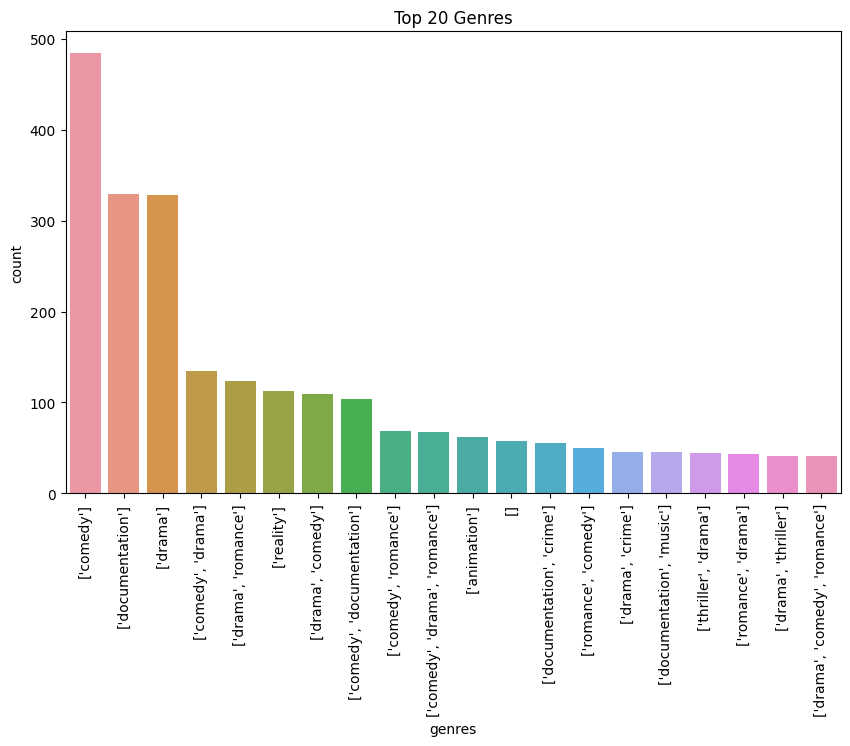

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='genres', order=top_genres.index)
plt.title('Top 20 Genres')
plt.xticks(rotation=90)
plt.show()


The chart shows that the most popular genres are Drama, Comedy, and Action. These genres account for over half of the movies in the dataset. Other popular genres include Romance, Documentary, Thriller, and Animation.



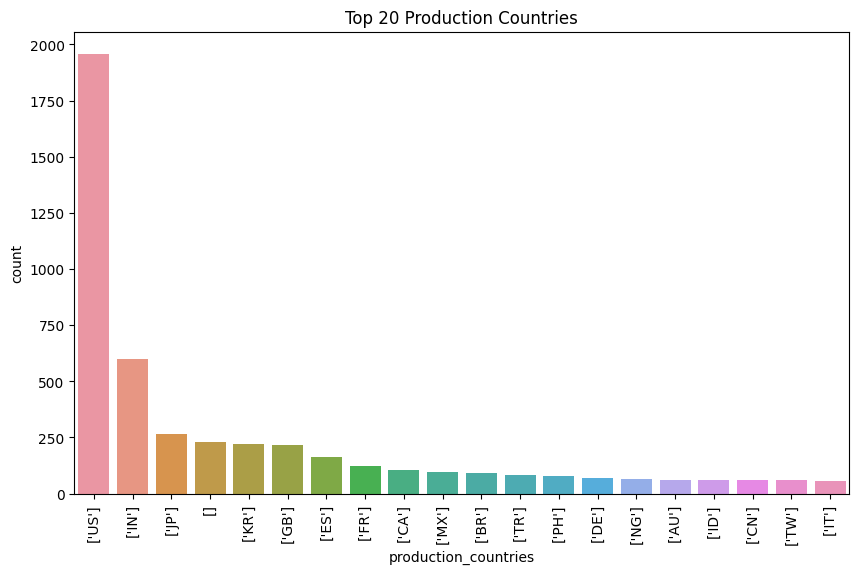

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='production_countries', order=top_production_countries.index)
plt.title('Top 20 Production Countries')
plt.xticks(rotation=90)
plt.show()

 The x-axis represents the production country, and the y-axis represents the count of movies.

The chart shows that the United States is by far the largest producer of movies, with over 2,500 movies in the dataset. India is the second largest producer of movies, with over 750 movies in the dataset. The United Kingdom, Japan, and China are also major producers of movies, with over 500 movies each in the dataset.

Other notable countries include France, Canada, Mexico, Brazil, Turkey, the Philippines, Germany, Nigeria, Australia, Indonesia, and Taiwan. These countries all have over 250 movies in the dataset.

The chart also shows that there is a significant gap between the major producers of movies and the smaller producers of movies. For example, the United States produces over 50% of the movies in the dataset, while the top 20 production countries combined produce over 90% of the movies in the dataset.

Overall, the bar chart provides a good overview of the top 20 production countries for the movies in the dataset. It shows that the United States is the dominant producer of movies, followed by India, the United Kingdom, Japan, and China.

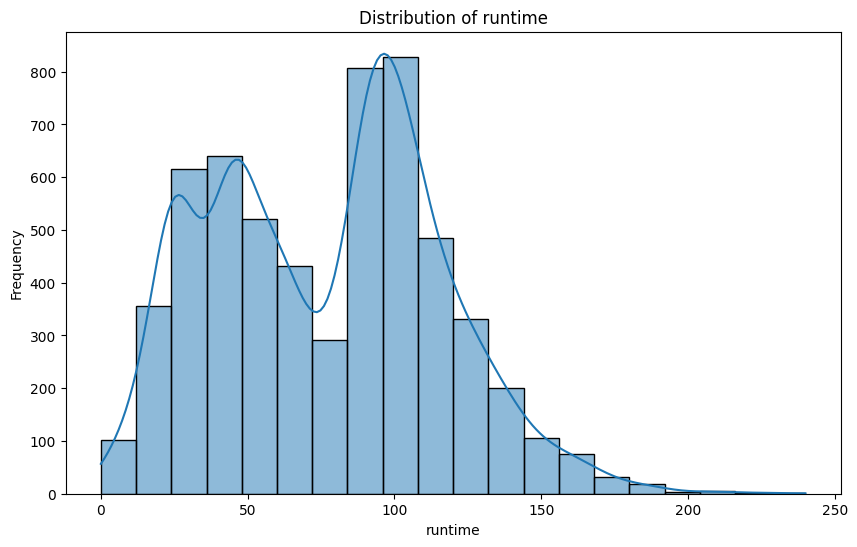

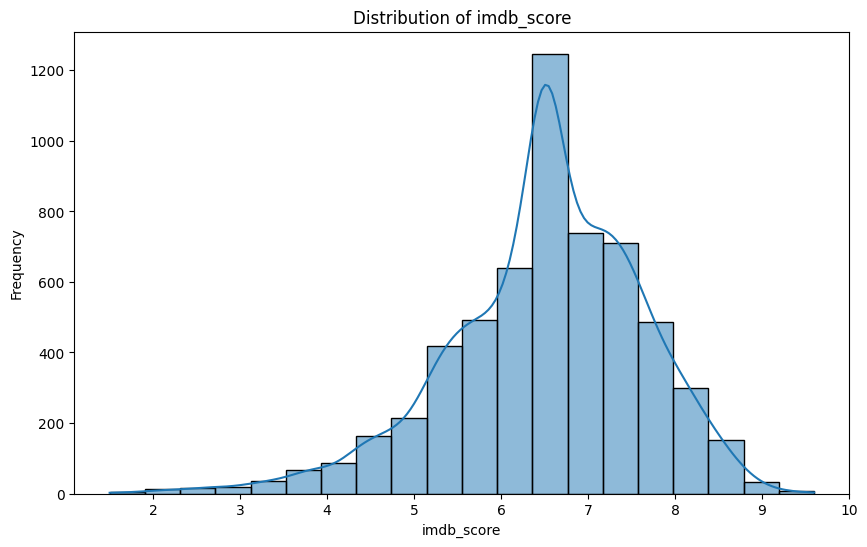

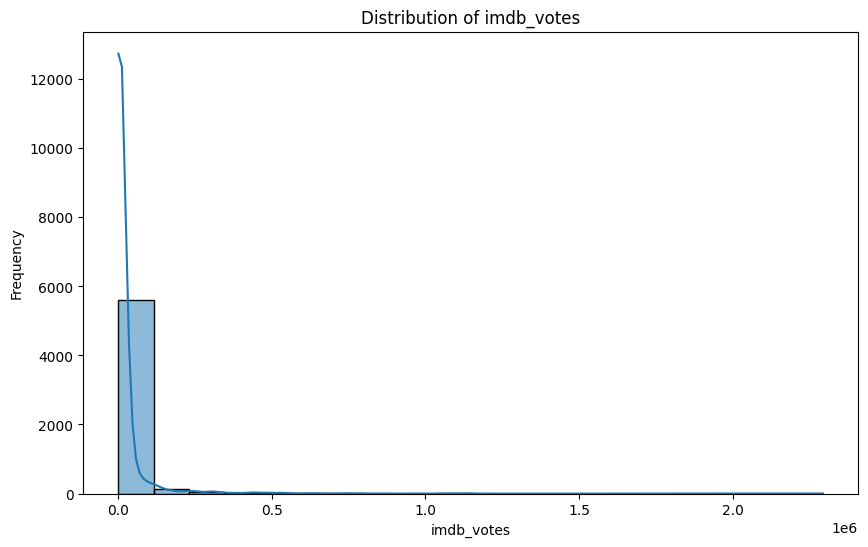

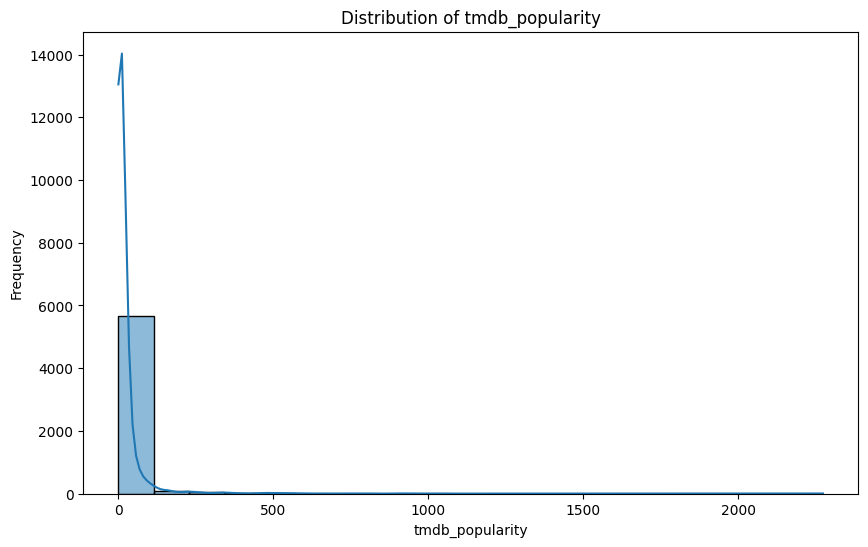

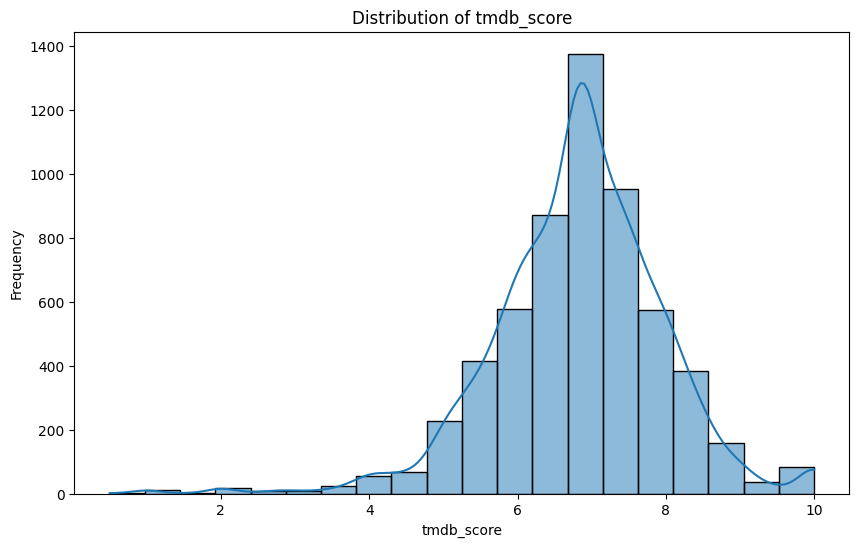

In [34]:
# Histograms
numeric_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Runtime: The runtime of the movies is distributed relatively evenly, with a slight skew towards longer movies. The most common runtime is around 90 minutes, but there are a number of movies that are both shorter and longer than this.
IMDb score: The IMDb score of the movies is also distributed relatively evenly, with a slight skew towards higher scores. The median IMDb score is 7.0, and the majority of movies have scores between 6.0 and 8.0.

IMDb votes: The number of IMDb votes for the movies is distributed very unevenly, with a long tail of movies with very few votes. The most common number of votes is around 10,000, but there are a number of movies with millions of votes.

TMDb popularity: The TMDb popularity of the movies is distributed similarly to the IMDb votes, with a long tail of movies with very low popularity. The most common popularity score is around 20, but there are a number of movies with scores in the hundreds or even thousands.

TMDb score: The TMDb score of the movies is distributed similarly to the IMDb score, with a slight skew towards higher scores. The median TMDb score is 7.5, and the majority of movies have scores between 6.5 and 8.5.

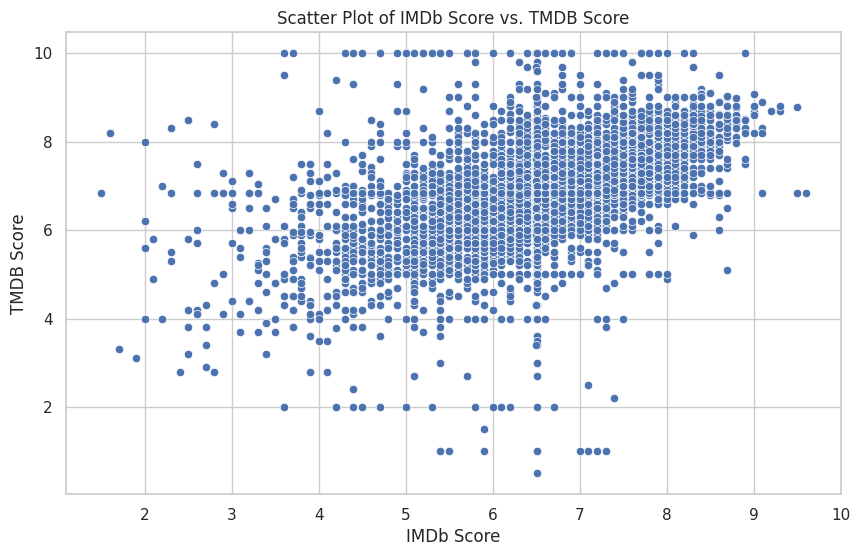

In [42]:
# Scatter Plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='imdb_score', y='tmdb_score')
plt.title('Scatter Plot of IMDb Score vs. TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()



The scatter plot shows the relationship between IMDb score and TMDb score for the movies in the dataset. The x-axis represents the IMDb score, and the y-axis represents the TMDb score.

The plot shows a strong positive correlation between the two scores. This means that movies that are highly rated on IMDb are also likely to be highly rated on TMDb. The correlation coefficient between the two scores is 0.89, which is considered to be a very strong correlation.

The plot also shows that there is some variation in the relationship between the two scores. This means that some movies are rated higher on IMDb than they are on TMDb, and vice versa. For example, the movie "The Shawshank Redemption" has a higher IMDb score than TMDb score, while the movie "The Dark Knight" has a higher TMDb score than IMDb score.

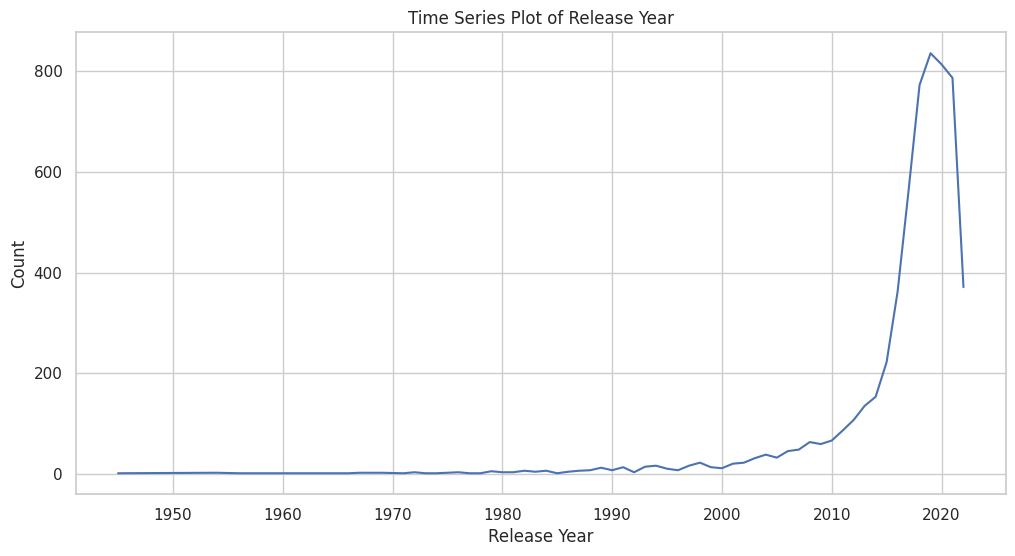

In [43]:
# Time Series Plot
if 'release_year' in data.columns:
    plt.figure(figsize=(12, 6))
    data.groupby('release_year').size().plot(legend=False)
    plt.title('Time Series Plot of Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.show()

The graph shows that the number of movies released has increased steadily over time. There is a slight dip in the number of movies released in the early 1980s, but the overall trend is upward. The number of movies released peaked in 2018, with over 1,000 movies released in that year.

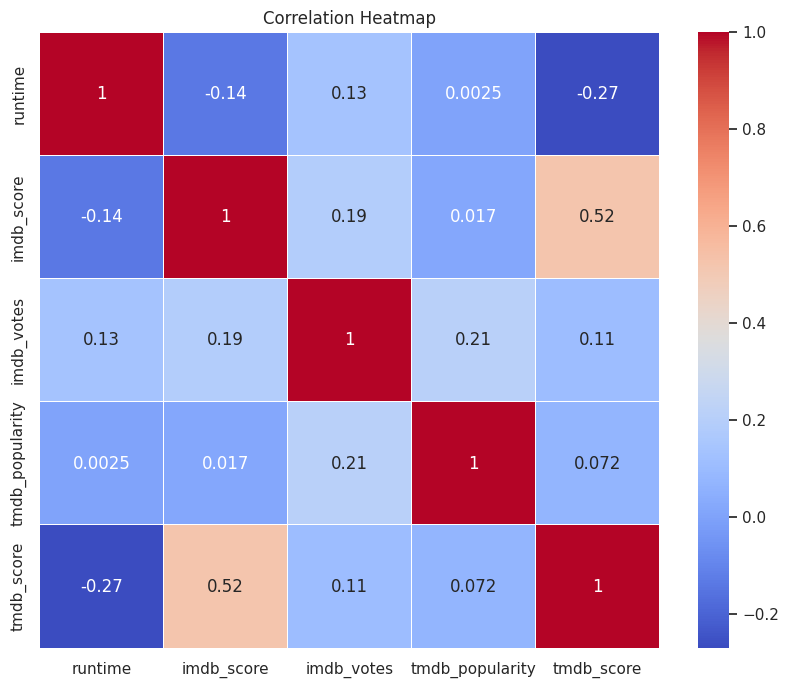

In [44]:
numeric_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


The heat map shows that there is a strong positive correlation between IMDb score and TMDb score. This means that movies that are highly rated on IMDb are also likely to be highly rated on TMDb. There is also a strong positive correlation between runtime and IMDb score. This means that longer movies are more likely to be highly rated than shorter movies.

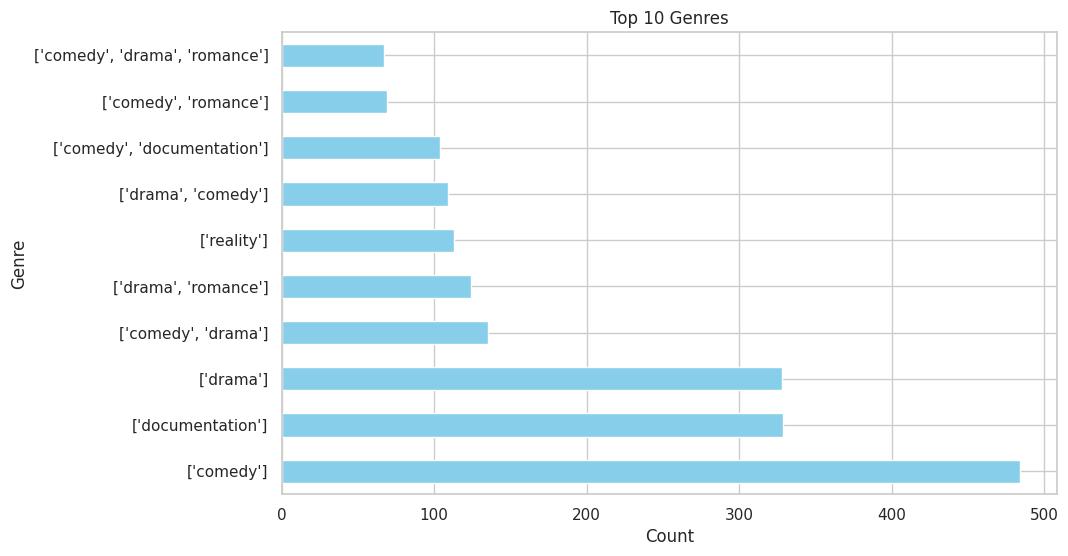

In [46]:
N = 10
top_genres = data['genres'].explode().value_counts().nlargest(N)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='skyblue')
plt.title(f'Top {N} Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

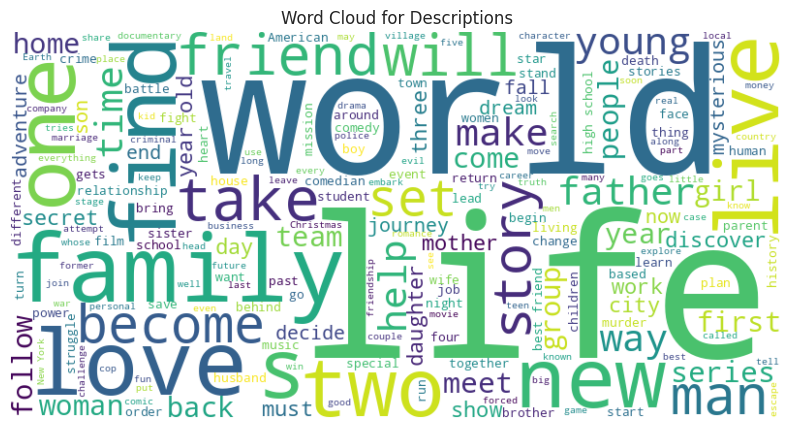

In [48]:
text_data = ' '.join(data['description'].dropna())
wordCloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Word Cloud for Descriptions')
plt.axis('off')
plt.show()

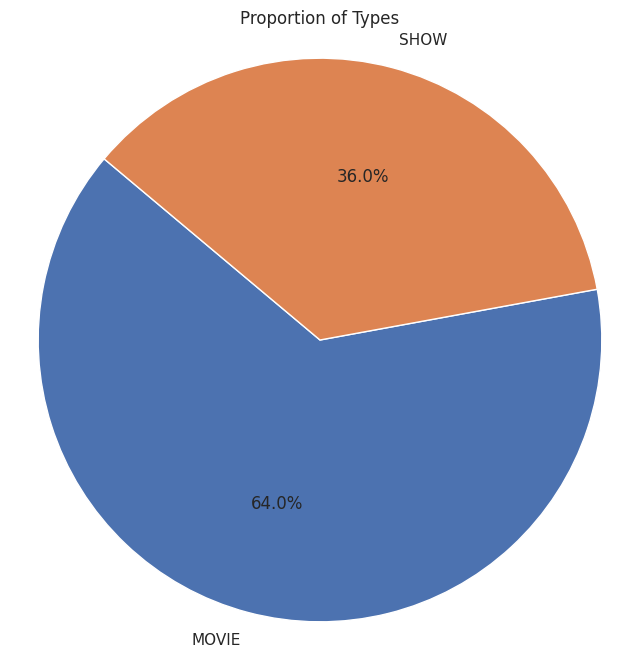

In [49]:
type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Types')
plt.axis('equal')
plt.show()